In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

from os import listdir
from os.path import isfile, join

In [103]:
results_path = 'D:\\Pablo\\clases\\UJM\\1. Semester, 2020\\Advanced Algorithms\\Project\\code\\bnb_test\\run_results'

file_list = [f for f in listdir(results_path) if isfile(join(results_path, f))]

frames = []
for file_name in file_list:
    if file_name.endswith('_12.csv'):
        splitted_name = file_name.split('_')
        df = pd.read_csv(results_path+'/'+file_name)
        df['alphabet_len'] = len(splitted_name[1])
        df['test_type'] = splitted_name[2]
        frames.append(df)
results = pd.concat(frames)
results = results[['algorithm','alphabet_len','test_type','len','clock_time','ed','calls']]

results.head()

,algorithm,alphabet_len,test_type,len,clock_time,ed,calls
0,dinamic_programming,22,atmost20,1,0.000040,0.0,1
1,branch_and_bound_len,22,atmost20,1,0.000010,0.0,2
2,branch_and_bound_cnt,22,atmost20,1,0.000014,0.0,2
3,dinamic_programming,22,atmost20,1,0.000026,0.0,1
4,branch_and_bound_len,22,atmost20,1,0.000009,0.0,2


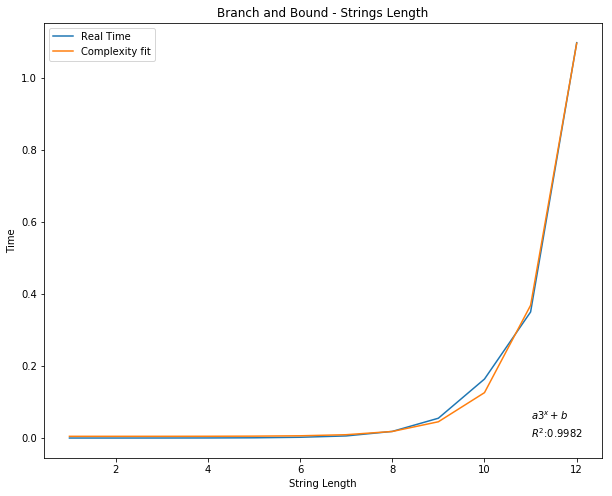

In [145]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == 'branch_and_bound_len') & (results['test_type'] == 'randompair')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

#Experimiental fit to complexity
fit = np.polyfit(graph_data['len'].apply(lambda x: 3**x), graph_data['clock_time'],1)    
graph_data['clock_time_fit'] = graph_data['len'].apply(lambda x: fit[0]*3**x+fit[1])

r_square = r2_score(graph_data['clock_time'], graph_data['clock_time_fit'])
ax.set_title('Branch and Bound - Strings Length')

ax.set_ylabel('Time')
ax.set_xlabel('String Length')
ax.text(11,0.05,'$a3^x+b$')
ax.text(11,0,'$R^2$:'+str('{:.4f}'.format(r_square)))

g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label='Real Time')
g = sns.lineplot(data = graph_data, x='len', y='clock_time_fit', ax = ax, label='Complexity fit')

plt.show()

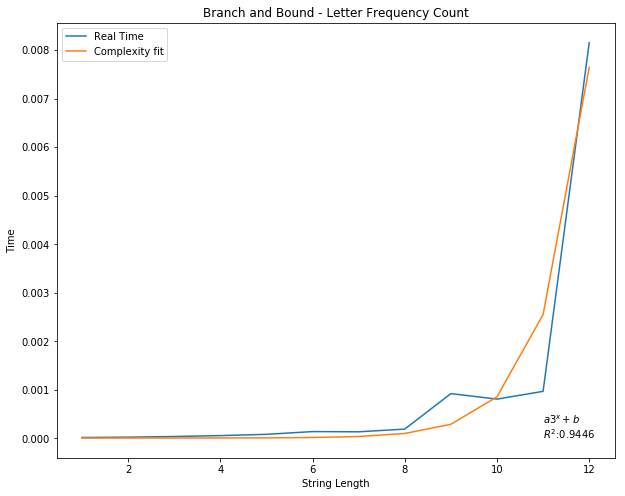

In [148]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == 'branch_and_bound_cnt') & (results['test_type'] == 'randompair')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

#Experimiental fit to complexity
fit = np.polyfit(graph_data['len'].apply(lambda x: 3**x), graph_data['clock_time'],1)    
graph_data['clock_time_fit'] = graph_data['len'].apply(lambda x: fit[0]*3**x+fit[1])

r_square = r2_score(graph_data['clock_time'], graph_data['clock_time_fit'])
ax.set_title('Branch and Bound - Letter Frequency Count')

ax.set_ylabel('Time')
ax.set_xlabel('String Length')
ax.text(11,0.0003,'$a3^x+b$')
ax.text(11,0,'$R^2$:'+str('{:.4f}'.format(r_square)))

g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label='Real Time')
g = sns.lineplot(data = graph_data, x='len', y='clock_time_fit', ax = ax, label='Complexity fit')

plt.show()

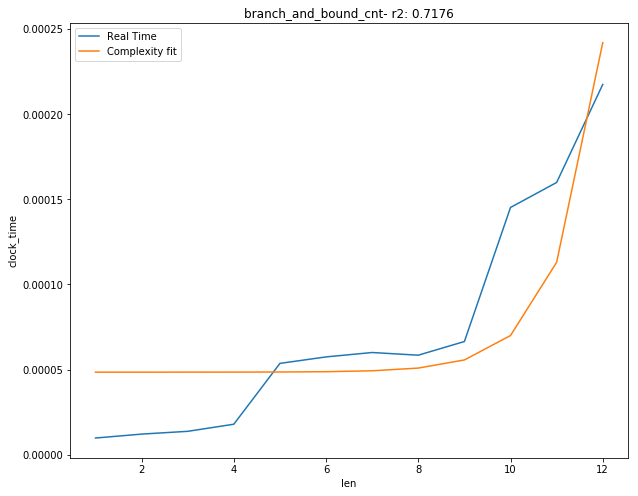

In [122]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == 'branch_and_bound_len') & (results['test_type'] == 'atmost20')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

#Experimiental fit to complexity
fit = np.polyfit(graph_data['len'].apply(lambda x: 3**x), graph_data['clock_time'],1)    
graph_data['clock_time_fit'] = graph_data['len'].apply(lambda x: fit[0]*3**x+fit[1])

r_square = r2_score(graph_data['clock_time'], graph_data['clock_time_fit'])
ax.set_title(algo+'- r2: '+str('{:.4f}'.format(r_square)))

g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label='Real Time')
g = sns.lineplot(data = graph_data, x='len', y='clock_time_fit', ax = ax, label='Complexity fit')

plt.show()

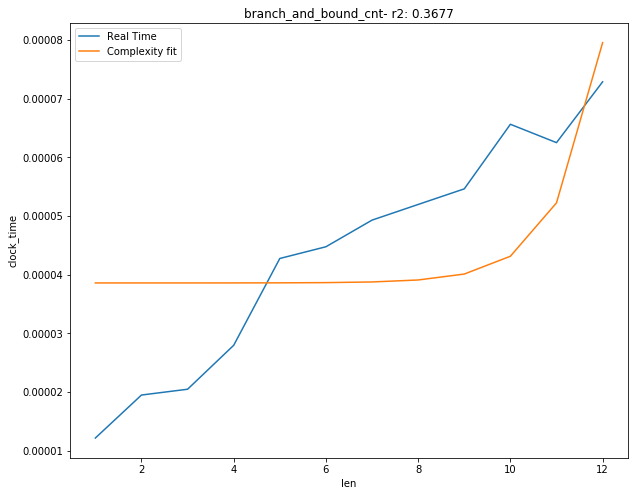

In [124]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == 'branch_and_bound_cnt') & (results['test_type'] == 'atmost20')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

#Experimiental fit to complexity
fit = np.polyfit(graph_data['len'].apply(lambda x: 3**x), graph_data['clock_time'],1)    
graph_data['clock_time_fit'] = graph_data['len'].apply(lambda x: fit[0]*3**x+fit[1])

r_square = r2_score(graph_data['clock_time'], graph_data['clock_time_fit'])
ax.set_title(algo+'- r2: '+str('{:.4f}'.format(r_square)))

g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = ax, label='Real Time')
g = sns.lineplot(data = graph_data, x='len', y='clock_time_fit', ax = ax, label='Complexity fit')

plt.show()

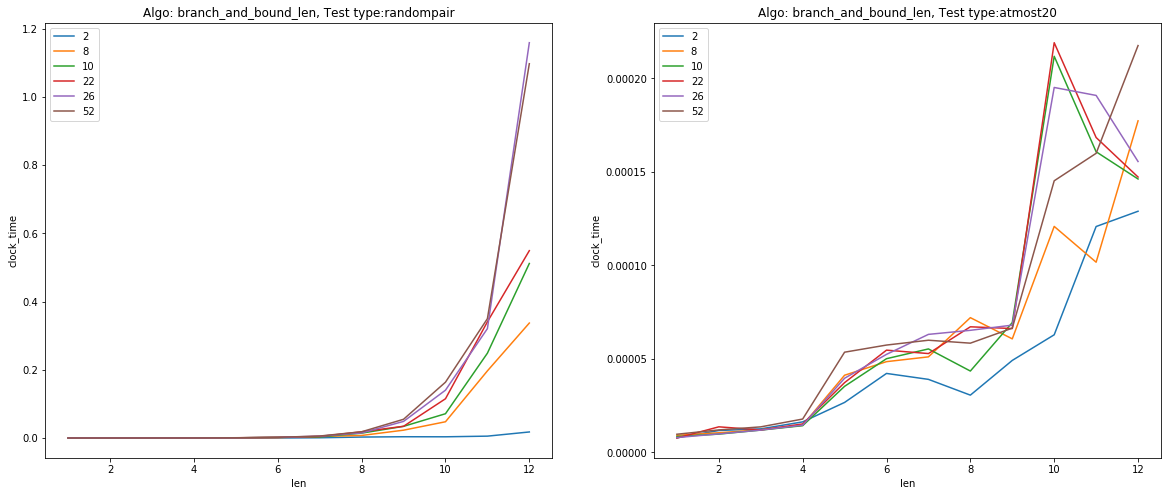

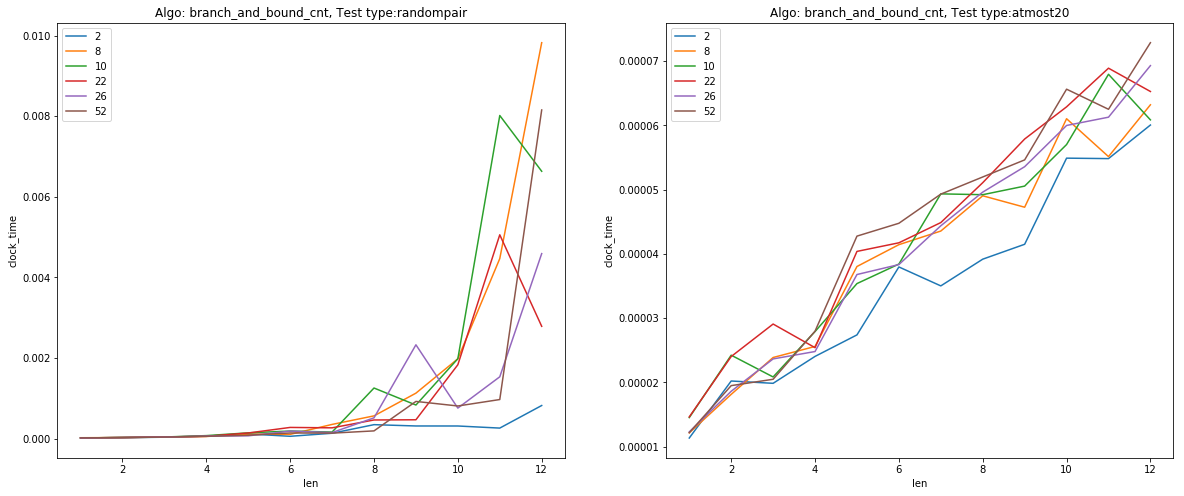

In [106]:
for algo in ['branch_and_bound_len', 'branch_and_bound_cnt']:
    fig, axs = plt.subplots(ncols=2,figsize=(20,8))
    tests = ['randompair','atmost20']
    for i in range(0,len(tests)):
        test_type = tests[i]
        alphabet_list = results['alphabet_len'].unique()
        alphabet_list.sort()

        for alpha_len in alphabet_list:
                graph_data = results[(results['alphabet_len'] == alpha_len) & (results['test_type'] == test_type) & (results['algorithm'] == algo)]
                graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

                g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = axs[i], label=alpha_len)

        axs[i].set_title('Algo: '+algo+', Test type:'+test_type)
    plt.show()

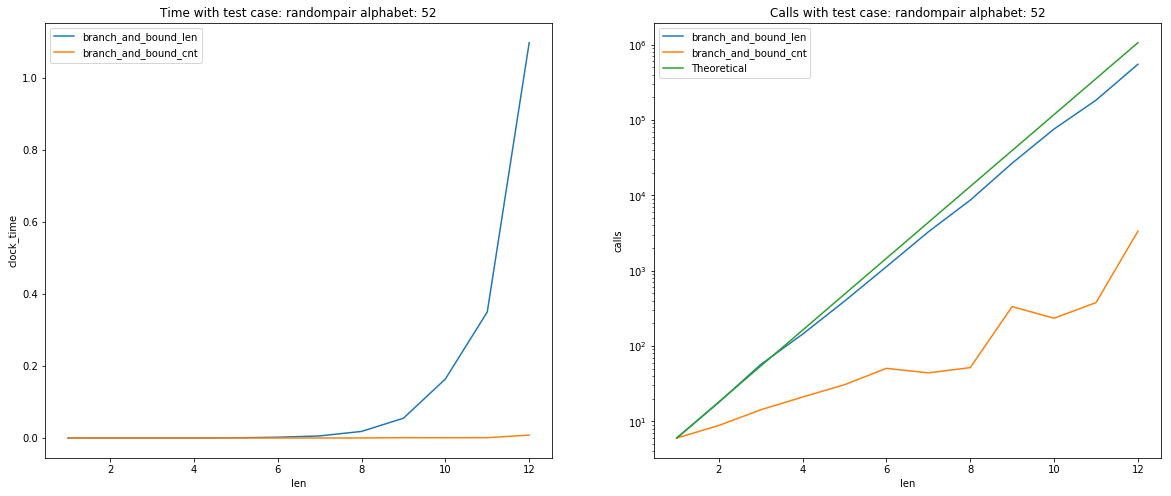

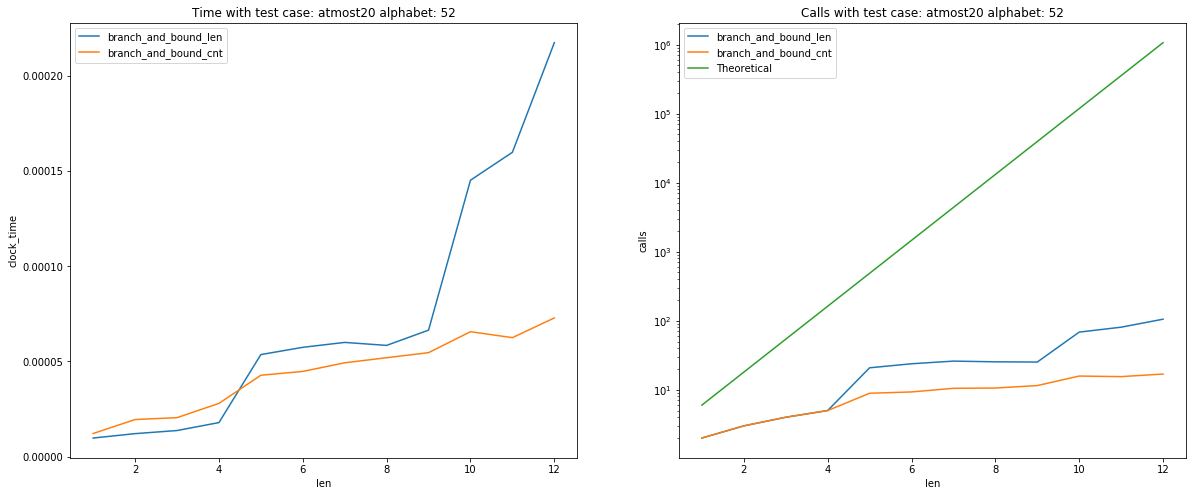

In [107]:
for test_type in ['randompair','atmost20']:
    fig, axs = plt.subplots(ncols=2,figsize=(20,8))

    for algo in ['branch_and_bound_len', 'branch_and_bound_cnt']:
        graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == algo) & (results['test_type'] == test_type)]
        graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

        axs[0].set_title('Time with test case: '+test_type+' alphabet: 52')

        g = sns.lineplot(data = graph_data, x='len', y='clock_time', ax = axs[0], label=algo)

    for algo in ['branch_and_bound_len', 'branch_and_bound_cnt']:
        graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == algo) & (results['test_type'] == test_type)]
        graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()
        
        axs[1].set_title('Calls with test case: '+test_type+' alphabet: 52')

        g = sns.lineplot(data = graph_data, x='len', y='calls', ax = axs[1], label=algo)

    #Theoretical for # of calls
    x = [_ for _ in range(1,13)]
    y = [2*3**x_val for x_val in x]
    df_theo = pd.DataFrame()
    df_theo['x'] = x
    df_theo['y'] = y
    
    g = sns.lineplot(data = df_theo, x='x', y='y', ax = axs[1], label='Theoretical')
    
    axs[1].set_yscale('log')
        
    plt.show()

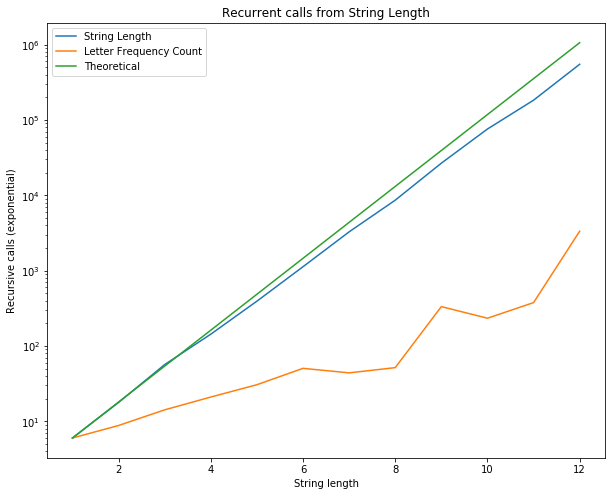

In [157]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

algo_names = {'branch_and_bound_len':'String Length', 
              'branch_and_bound_cnt':'Letter Frequency Count'}

for algo in ['branch_and_bound_len', 'branch_and_bound_cnt']:
    graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == algo) & (results['test_type'] == 'randompair')]
    graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

    g = sns.lineplot(data = graph_data, x='len', y='calls', ax = ax, label=algo_names[algo])

#Theoretical for # of calls
x = [_ for _ in range(1,13)]
y = [2*3**x_val for x_val in x]
df_theo = pd.DataFrame()
df_theo['x'] = x
df_theo['y'] = y

g = sns.lineplot(data = df_theo, x='x', y='y', ax = ax, label='Theoretical')

ax.set_yscale('log')

ax.set_title('Recurrent calls from String Length')
ax.set_xlabel('String length')
ax.set_ylabel('Recursive calls (exponential)')


plt.show()

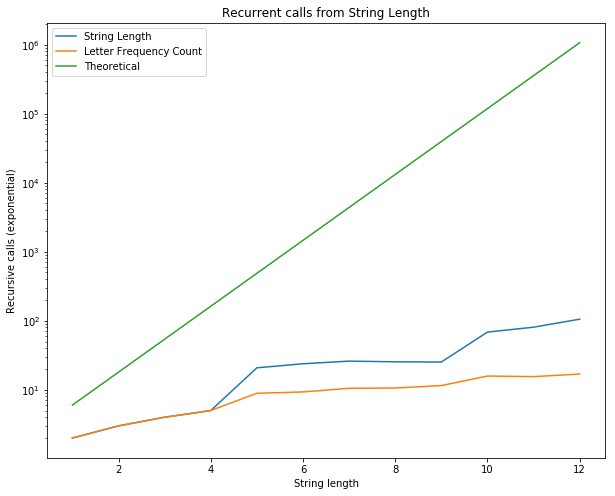

In [158]:
fig, ax = plt.subplots(ncols=1,figsize=(10,8))

algo_names = {'branch_and_bound_len':'String Length', 
              'branch_and_bound_cnt':'Letter Frequency Count'}

for algo in ['branch_and_bound_len', 'branch_and_bound_cnt']:
    graph_data = results[(results['alphabet_len'] == 52) & (results['algorithm'] == algo) & (results['test_type'] == 'atmost20')]
    graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

    g = sns.lineplot(data = graph_data, x='len', y='calls', ax = ax, label=algo_names[algo])

#Theoretical for # of calls
x = [_ for _ in range(1,13)]
y = [2*3**x_val for x_val in x]
df_theo = pd.DataFrame()
df_theo['x'] = x
df_theo['y'] = y

g = sns.lineplot(data = df_theo, x='x', y='y', ax = ax, label='Theoretical')

ax.set_yscale('log')

ax.set_title('Recurrent calls from String Length')
ax.set_xlabel('String length')
ax.set_ylabel('Recursive calls (exponential)')


plt.show()

In [113]:
quality_ed = results.groupby(['algorithm','alphabet_len','test_type','len']).mean().reset_index() \
                    [['algorithm','alphabet_len','test_type','len','ed']]
    
quality_ed = quality_ed.pivot(index=['alphabet_len','test_type','len'], columns=['algorithm'],values='ed').reset_index()
quality_ed = quality_ed.rename(columns={'dinamic_programming':'optimal'})

quality_ed[(quality_ed['branch_and_bound_len']!=quality_ed['optimal']) | (quality_ed['branch_and_bound_cnt']!=quality_ed['optimal'])]

algorithm,alphabet_len,test_type,len,branch_and_bound_cnt,branch_and_bound_len,optimal
19,2,randompair,8,4.3,4.2,4.2
20,2,randompair,9,4.6,4.4,4.4
22,2,randompair,11,4.4,4.3,4.3
23,2,randompair,12,5.0,4.7,4.7
55,8,randompair,8,6.3,6.2,6.2
59,8,randompair,12,9.8,9.7,9.7
91,10,randompair,8,7.5,7.2,7.2
94,10,randompair,11,9.7,9.6,9.6
166,26,randompair,11,10.5,10.4,10.4
202,52,randompair,11,10.7,10.6,10.6


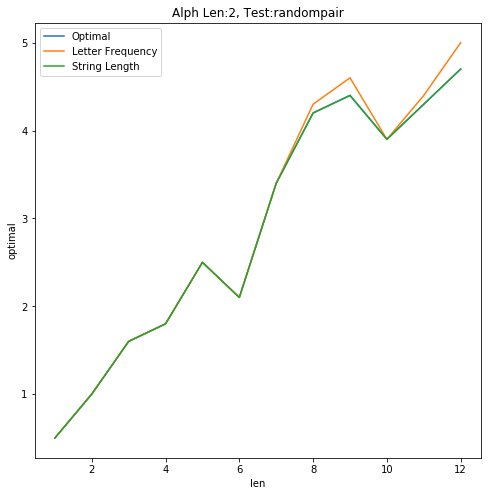

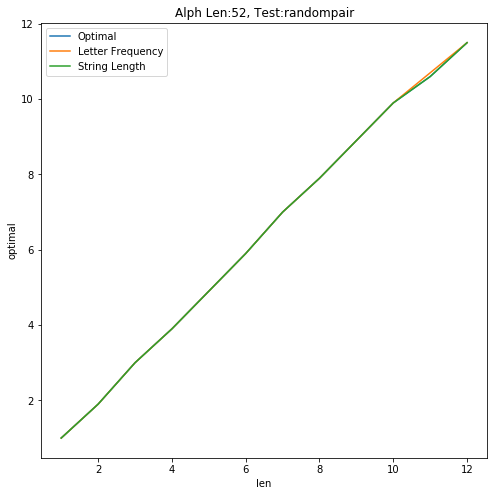

In [116]:
alphabet_list = results['alphabet_len'].unique()
alphabet_list.sort()

for alphabet_len in [2,52]:
    for test_type in ['randompair']:
        graph_data = quality_ed[(quality_ed['alphabet_len']==alphabet_len) & (quality_ed['test_type']==test_type)]
        fig, ax = plt.subplots(ncols=1,figsize=(8,8))
        
        g = sns.lineplot(data=graph_data, x='len', y='optimal', ax = ax, label='Optimal')
        g = sns.lineplot(data=graph_data, x='len', y='branch_and_bound_cnt', ax = ax, label='Letter Frequency')
        g = sns.lineplot(data=graph_data, x='len', y='branch_and_bound_len', ax = ax, label='String Length')
    
        ax.set_title('Alph Len:'+str(alphabet_len)+', Test:'+test_type)
        
        plt.show()

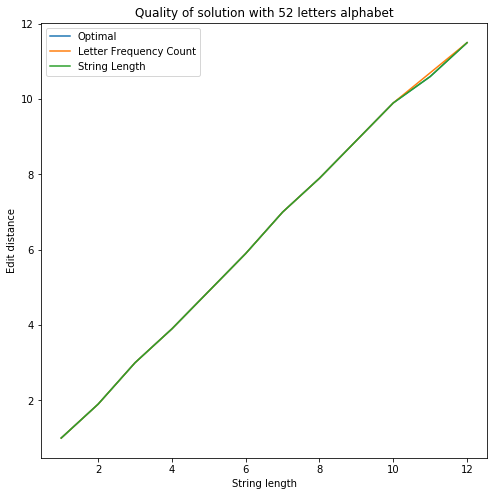

In [154]:

graph_data = quality_ed[(quality_ed['alphabet_len']==52) & (quality_ed['test_type']=='randompair')]
fig, ax = plt.subplots(ncols=1,figsize=(8,8))

g = sns.lineplot(data=graph_data, x='len', y='optimal', ax = ax, label='Optimal')
g = sns.lineplot(data=graph_data, x='len', y='branch_and_bound_cnt', ax = ax, label='Letter Frequency Count')
g = sns.lineplot(data=graph_data, x='len', y='branch_and_bound_len', ax = ax, label='String Length')

ax.set_title('Quality of solution with 52 letters alphabet')
ax.set_xlabel('String length')
ax.set_ylabel('Edit distance')

plt.show()